In [104]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

import cv2
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [105]:
labels = ["Airplane", "automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [106]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [107]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [108]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

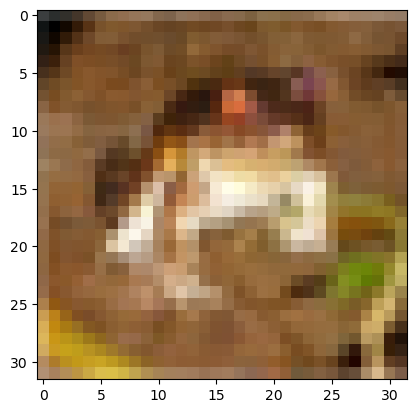

In [109]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [110]:
y_train[0]

array([6], dtype=uint8)

In [111]:
np.unique(y_train, return_counts = True)  # 종속변수 개수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [112]:
scaled_train = x_train.reshape(-1, 32, 32, 3) / 255
scaled_test = x_test.reshape(-1,  32, 32, 3) / 255

### 합성곱 신경망 설정

In [113]:
model = keras.Sequential()

In [114]:
model = keras.Sequential()

model.add(Conv2D(filters = 16, kernel_size =2, padding='same', activation='relu'
                , input_shape = (32, 32, 3)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.3))

In [115]:
model.add(Flatten())

In [116]:
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)         

In [118]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [119]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [120]:
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                             stratify= y_train, random_state = 12)

In [121]:
history = model.fit(x_sub, y_sub, validation_data=(x_val, y_val), epochs = 50,
                   callbacks = [early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 15s 11ms/step - loss: 1.5832 - accuracy: 0.4211 - val_loss: 1.2736 - val_accuracy: 0.5353
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2800 - accuracy: 0.5387 - val_loss: 1.1670 - val_accuracy: 0.5833
Epoch 3/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1692 - accuracy: 0.5840 - val_loss: 1.0638 - val_accuracy: 0.6254
Epoch 4/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0779 - accuracy: 0.6169 - val_loss: 0.9683 - val_accuracy: 0.6604
Epoch 5/50
1250/1250 [==============================] - 14s 12ms/step - loss: 1.0009 - accuracy: 0.6439 - val_loss: 0.9300 - val_accuracy: 0.6716
Epoch 6/50
1250/1250 [==============================] - 14s 12ms/step - loss: 0.9503 - accuracy: 0.6626 - val_loss: 0.8674 - val_accuracy: 0.6914
Epoch 7/50
1250/1250 [==============================] - 16s 12ms/step - loss: 0.9021 - accuracy: 0.6798 - val_loss: 0.8824 -

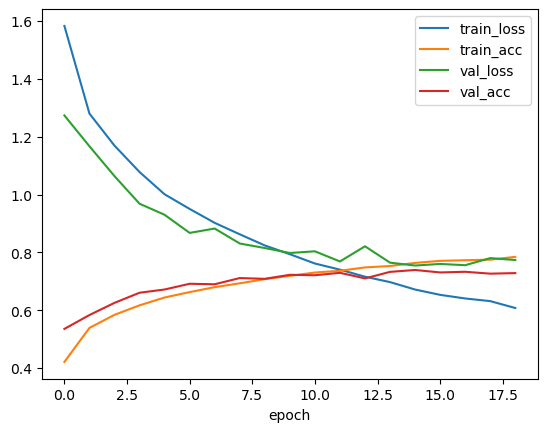

In [122]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

In [123]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7668 - accuracy: 0.7366


[0.7667936682701111, 0.7365999817848206]

In [124]:
preds = model.predict(scaled_test)

313/313 [==============================] - 1s 3ms/step


In [125]:
preds.shape

(10000, 10)

In [126]:
preds[0]

array([8.8829584e-06, 7.9061465e-06, 2.3148058e-03, 7.8161579e-01,
       5.1492734e-05, 1.8883859e-01, 2.6932459e-02, 5.2495889e-06,
       1.6923457e-04, 5.5620127e-05], dtype=float32)

In [127]:
pred_arr = np.argmax(preds, axis = 1)

In [128]:
pred_arr

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [129]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [130]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

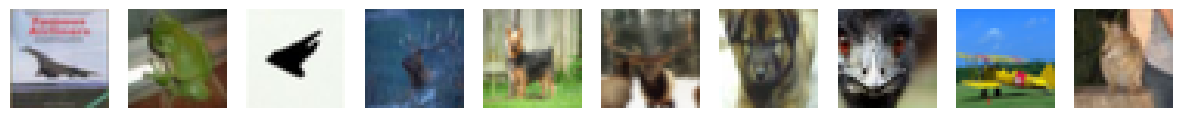

In [131]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [132]:
y_test[x_match[:10]]

array([[0],
       [6],
       [0],
       [4],
       [5],
       [4],
       [5],
       [2],
       [0],
       [3]], dtype=uint8)